# 경로설정

In [452]:
import os
import numpy as np
DATA_PATH = os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA3')  #os.path.join( file name) 파일 이름만 정해주고 경로는 현재 경로이다.

actions = np.array(['leaning','sitting_chair','sitting_floor','slow_walking','standing','walking'])

no_sequences = 40 #영상 30개 만들어지는데

sequence_length = 20 #영상 1개의 프레임수는 100게

#os.path.join(dir_path, file name)으로 인자를 전달하면 
#디렉토리 경로에 파일 이름을 조합하고 그 path를 리턴합니다.

In [193]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
#os.makedirs('./a/b/c', exist_ok=True)
#파일 '여러개'를 만든다. .(현재경로에)/a파일을 만들고/b파일을 만들고/c파일을 만든다


# mqtt 데이터 수신 저장 및 라벨링

In [453]:
# 데이터 저장 루프 정의

# 수신 확인
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
window = []


def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_q7_01/data/_all")
    

def on_message(client, userdata, msg):
    global row
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    row=[] 
    row.append((data[0][1],data[1][1],data[2][1],data[3][1],data[4][1],data[5][1],data[6][1],data[7][1],))
    row = np.array(row)
    p = os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy')  
    np.save(path, row[0])
    np.save(p, row[0])
    #print('row:',row[0])
    return row[0]
    


    ''' window.extend([row[0]])
    print('window',window)
    #print('-'*70)
    if len(window) == 30:
        path1 =  os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy')         
        np.save(path1, window)'''

    
    #df.loc[len(df)] = test.values()
    
    

client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

#client.loop_forever()

0

In [454]:
# 영상, mqtt데이터 동시수신 
import time

cap = cv2.VideoCapture(0)
f=1
frame_count = 0
total_fps = 0 
'''client = mqtt.Client("mqtt-test")
columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
userdata = df
'''
while cap.isOpened():
    start_time = time.time()
    ret,frame = cap.read()
    
    
    #보여줘
    cv2.imshow('me',frame) 
    client.loop()
    res = np.load(os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy'))
    print('Ax,Ay,Az:',res[0:4])

    
    
    #Calculatio for FPS
    end_time = time.time()


    fps = 1 / (end_time - start_time)
    total_fps += fps
    frame_count += 1
    f=f+1
    print(f)
    print('fps:',fps)
    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  



Mqtt Connected!
Ax,Ay,Az: [ 1.66930051e+09 -7.39358521e+00  5.45843506e+00 -3.57945251e+00]
2
fps: 3.1624907823920694
Ax,Ay,Az: [ 1.66930051e+09 -7.39358521e+00  5.45843506e+00 -3.57945251e+00]
3
fps: 126.47922320728544
Ax,Ay,Az: [ 1.66930051e+09 -7.39358521e+00  5.45843506e+00 -3.57945251e+00]
4
fps: 334.47400318979265
Ax,Ay,Az: [ 1.66934578e+09 -4.33639526e-01 -2.46948242e-01  9.92025757e+00]
5
fps: 9.8070622565364
Ax,Ay,Az: [ 1.66934578e+09 -4.33639526e-01 -2.26608276e-01  9.90708923e+00]
6
fps: 35.63978723042673
Ax,Ay,Az: [ 1.66934578e+09 -4.15679932e-01 -2.44552612e-01  9.91307068e+00]
7
fps: 6.121829293033969
Ax,Ay,Az: [ 1.66934578e+09 -4.16885376e-01 -2.44552612e-01  9.92982483e+00]
8
fps: 33.5294860623696
Ax,Ay,Az: [ 1.66934578e+09 -4.36035156e-01 -2.39776611e-01  9.93222046e+00]
9
fps: 37.91804004881797
Ax,Ay,Az: [ 1.66934578e+09 -4.31243896e-01 -2.21817017e-01  9.89511108e+00]
10
fps: 6.242285516982727
Ax,Ay,Az: [ 1.66934579e+09 -4.42016602e-01 -2.39776611e-01  9.91905212e+00

In [195]:
# 영상과 mqtt 데이터 원하는 파일에 분류하여 저장

cap = cv2.VideoCapture(0)
print('H:',cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w:',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) 
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/Leeyourack/jookyoung/pose_code/video/extract6-1.avi', fourcc, fps, (w, h))


    
# 액션 선택
for action in actions:
    # 영상 선택
    for sequence in range(no_sequences):
        # 이미지 선택
        for frame_num in range(sequence_length):

            # 프레임 읽기
            ret, frame = cap.read()
            
            
            image = frame.copy()

          
            
            cv2.putText(image, ' frame :{}'.format(frame_num), (270,70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
            # 촬영 로직
            if frame_num == 0: 
                
                cv2.putText(image, 'STARTING COLLECTION', (140,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
                
                #기다렸다가 시작하자
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000) 
            else: 
                cv2.putText(image, 'SAVE_{}_DATA'.format(action), (70,400), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0, 255), 4, cv2.LINE_AA)
                cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2,  (255, 155, 50), 2, cv2.LINE_AA)
                
                cv2.imshow('OpenCV Feed', image)
            
            
            path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            print(client.loop())
            # keypoits 뽑기
            

            #영상 저장
            out.write(image)

            #끄기
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

            
out.release()                
cap.release()
cv2.destroyAllWindows()

H: 480.0
w: 640.0
Mqtt Connected!
0
0
0
row: [ 1.66926794e+09  5.77911377e-01 -2.10485840e+00  9.64970398e+00
  9.46044922e-04 -4.37927246e-03  1.90734863e-03  9.71832275e+00]
0
row: [ 1.66926794e+09  6.60507202e-01 -2.07731628e+00  9.57669067e+00
  9.46044922e-04 -4.37927246e-03  1.90734863e-03  1.00173950e+01]
0
row: [ 1.66926794e+09  5.63537598e-01 -1.98036194e+00  9.75265503e+00
  8.17871094e-03 -1.17492676e-03  4.45556641e-03  8.81805420e+00]
0
row: [ 1.66926794e+09  6.05438232e-01 -2.02584839e+00  9.69879150e+00
  8.17871094e-03 -1.17492676e-03  4.45556641e-03  9.71832275e+00]
0
row: [ 1.66926794e+09  5.56365967e-01 -2.05458069e+00  9.68322754e+00
 -2.28881836e-04 -1.48620605e-02  5.09643555e-03  1.07681274e+01]
0
row: [ 1.66926794e+09  6.54525757e-01 -1.99592590e+00  9.61019897e+00
 -2.28881836e-04 -1.48620605e-02  5.09643555e-03  1.04675293e+01]
0
row: [ 1.66926794e+09  6.35360718e-01 -2.04739380e+00  9.54675293e+00
  5.73730469e-03 -2.88391113e-03  9.91821289e-04  1.00173950e+

## 입력된 데이터  그래프 확인(Ax,Ay,Az)

In [205]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

# 저장된 데이터 가져와 리스트에 넣기
sequences, labels, visual_list = [], [], []
for i,action in enumerate(actions):
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            res = np.delete(res,[0,4,5,6,7])
            label_res=np.append(res,i)
            label_res.tolist()
            #print("{}.npy".format(frame_num),label_res.tolist())
            visual_list.append(label_res.tolist())
            window.append(res)    # res:이미지 하나의 keypoints
        sequences.append(window)  # wilndow:영상1의 keypoints  #sequences:영상30개의 keypoints
        labels.append(label_map[action])

In [206]:
res

array([-0.25167847,  3.22463989, -0.44184875])

In [519]:
visual_df = pd.DataFrame(data = visual_list, columns = ['Ax', 'Ay','Az','label'])
visual_df = visual_df.astype({'label':np.int64})
visual_df.reset_index(inplace=True)
visual_df

,index,Ax,Ay,Az,label
0,0,0.577911,-2.104858,9.649704,0
1,1,0.660507,-2.077316,9.576691,0
2,2,0.563538,-1.980362,9.752655,0
3,3,0.577911,-2.104858,9.649704,0
4,4,0.660507,-2.077316,9.576691,0
...,...,...,...,...,...
4795,4795,-0.216965,1.254211,-0.311371,5
4796,4796,-0.845444,1.523560,-0.976959,5
4797,4797,-4.060852,21.440918,-0.844086,5
4798,4798,-0.130783,9.812286,-0.987732,5


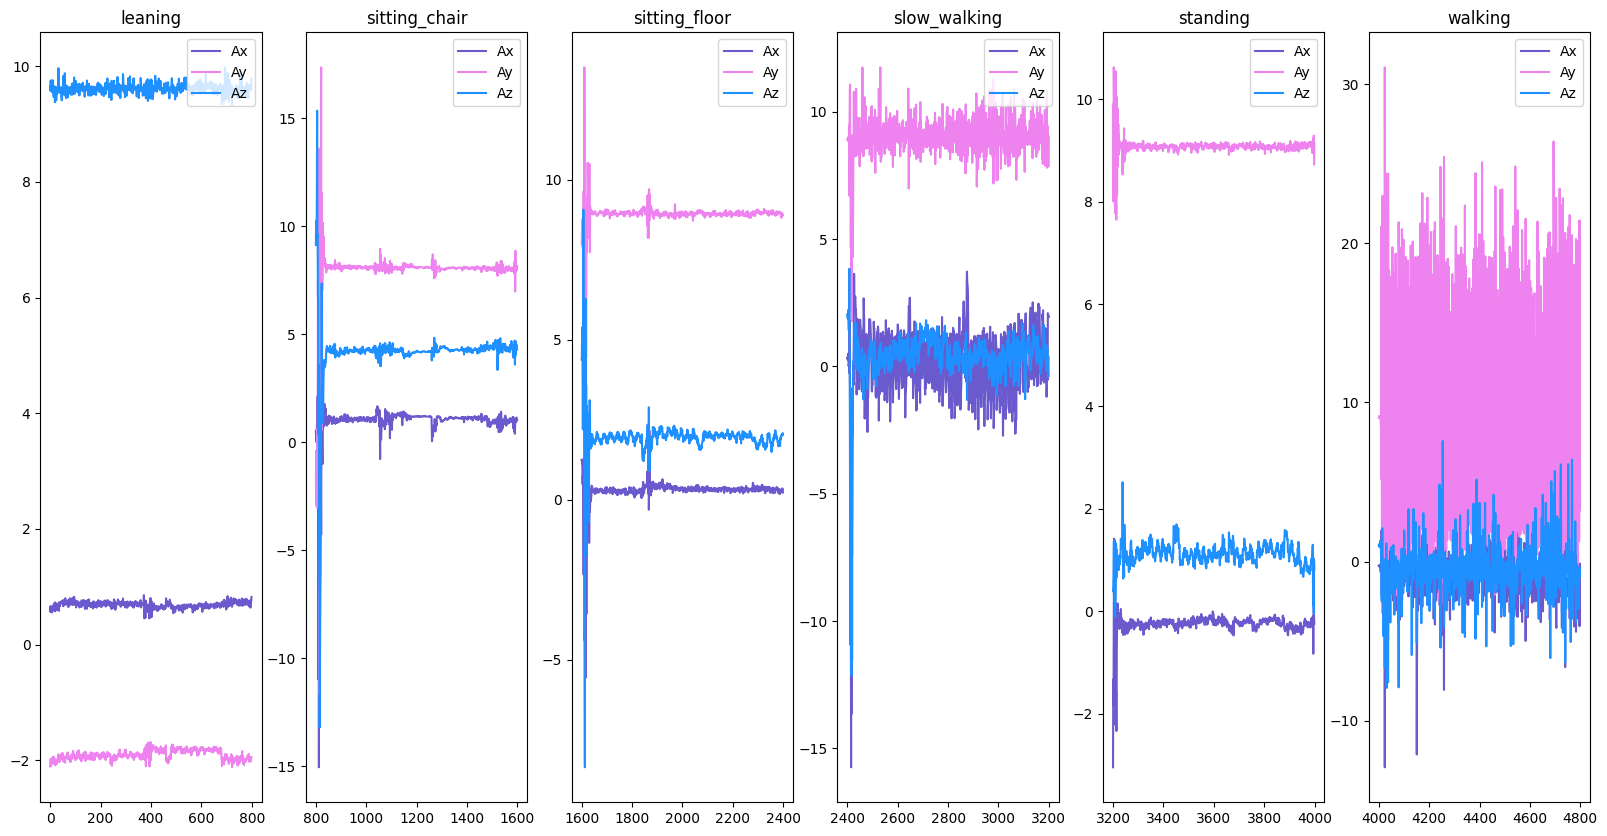

In [521]:
#가속도
#%matplotlib qt

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

x=[]
Ax=[]
Ay=[]
Az=[]
for i, action in enumerate(actions):
    x.append(visual_df.loc[visual_df['label']==i]['index'])
    Ax.append(visual_df.loc[visual_df['label']==i]['Ax'])
    Ay.append(visual_df.loc[visual_df['label']==i]['Ay'])
    Az.append(visual_df.loc[visual_df['label']==i]['Az'])

fig = plt.figure(figsize=(20, 10))
map=[]
for i, action in enumerate(actions):
    map.append(fig.add_subplot(1, 6, i+1))
    map[i].plot(x[i],Ax[i],'slateblue',label='Ax')
    map[i].plot(x[i],Ay[i],'violet',label='Ay')
    map[i].plot(x[i],Az[i],'dodgerblue',label='Az')
    map[i].legend(loc='upper right')

    plt.title(action)
plt.show()

# 데이터 전처리

In [209]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 20, 3)
(12, 20, 3)
(228, 6)
(12, 6)


In [228]:
y_train[0]

array([1, 0, 0, 0, 0, 0])

In [229]:
X_train[0]

array([[ 0.67965698, -1.98634338,  9.61499023],
       [ 0.71437073, -1.90614319,  9.57548523],
       [ 0.7179718 , -1.96240234,  9.58865356],
       [ 0.73233032, -1.90493774,  9.6880188 ],
       [ 0.65092468, -2.0186615 ,  9.62217712],
       [ 0.76464844, -1.93127441,  9.6305542 ],
       [ 0.7227478 , -1.95162964,  9.66647339],
       [ 0.70120239, -1.97557068,  9.58985901],
       [ 0.72634888, -1.92289734,  9.61499023],
       [ 0.7119751 , -1.9384613 ,  9.57429504],
       [ 0.70240784, -1.92289734,  9.71435547],
       [ 0.73951721, -1.89535522,  9.60540771],
       [ 0.67965698, -1.96000671,  9.63534546],
       [ 0.77183533, -1.87261963,  9.6413269 ],
       [ 0.72634888, -1.88937378,  9.63893127],
       [ 0.71916199, -1.90852356,  9.64251709],
       [ 0.70359802, -1.90493774,  9.57069397],
       [ 0.69403076, -1.91091919,  9.47373962],
       [ 0.61741638, -1.9384613 ,  9.57548523],
       [ 0.75627136, -1.84986877,  9.61857605]])

# 모델

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [215]:
model_mq = Sequential() #순차적으로 모델의 레이어를 추가한다.
model_mq.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,3)))
model_mq.add(LSTM(128, return_sequences=True, activation='relu'))
model_mq.add(LSTM(64, return_sequences=False, activation='relu'))
model_mq.add(Dense(64, activation='relu'))
model_mq.add(Dense(32, activation='relu'))
model_mq.add(Dense(actions.shape[0], activation='softmax'))


In [216]:
model_mq.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [217]:
model_mq.fit(X_train, y_train, epochs=500)

Epoch 1/500
8/8 [==============================] - 9s 892ms/step - loss: 1.6986 - categorical_accuracy: 0.2719
Epoch 2/500
8/8 [==============================] - 7s 876ms/step - loss: 1.1181 - categorical_accuracy: 0.5219
Epoch 3/500
8/8 [==============================] - 7s 859ms/step - loss: 0.4560 - categorical_accuracy: 0.8553
Epoch 4/500
8/8 [==============================] - 7s 884ms/step - loss: 0.4164 - categorical_accuracy: 0.9079
Epoch 5/500
8/8 [==============================] - 7s 821ms/step - loss: 0.2257 - categorical_accuracy: 0.9474
Epoch 6/500
8/8 [==============================] - 7s 821ms/step - loss: 0.1534 - categorical_accuracy: 0.9474
Epoch 7/500
8/8 [==============================] - 7s 827ms/step - loss: 0.1944 - categorical_accuracy: 0.9211
Epoch 8/500
8/8 [==============================] - 7s 823ms/step - loss: 0.1525 - categorical_accuracy: 0.9474
Epoch 9/500
8/8 [==============================] - 7s 820ms/step - loss: 0.1964 - categorical_accuracy: 0.9430
E

In [218]:

model_mq.save('C:/Users/Leeyourack/jookyoung/sensor/model/model_mq.h5')

In [219]:
from keras.models import load_model
model = load_model('C:/Users/Leeyourack/jookyoung/sensor/model/model_mq.h5')


## 모델평가

In [240]:
print(X_test.shape)
res = model.predict(X_test)



(12, 20, 3)
1/1 [==============================] - 0s 28ms/step


In [242]:
print(np.argmax(res[4]))
actions[np.argmax(res[4])]

3


'slow_walking'

In [243]:
actions[np.argmax(y_test[4])]

'slow_walking'

# confusion matrix

In [248]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [249]:
ytrue = np.argmax(y_test, axis=1).tolist() #실제
yhat = np.argmax(yhat, axis=1).tolist() #예측

In [250]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  1],
        [ 0,  1]],

       [[ 7,  0],
        [ 1,  4]],

       [[11,  0],
        [ 0,  1]],

       [[10,  0],
        [ 0,  2]],

       [[10,  0],
        [ 0,  2]],

       [[11,  0],
        [ 0,  1]]], dtype=int64)

In [251]:
accuracy_score(ytrue, yhat)

0.9166666666666666

# 모델 사용

In [455]:
# 데이터 저장 루프 정의
# 수신 확인

import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
window = []


def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_q7_01/data/_all")
    

def on_message(client, userdata, msg):
    global row
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    row=[] 
    row.append((data[0][1],data[1][1],data[2][1],data[3][1],data[4][1],data[5][1],data[6][1],data[7][1],))
    row = np.array(row)
    p = os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy')  
    np.save(path, row[0])
    np.save(p, row[0])
    print('row:',row[0])
    return row[0]
    


    ''' window.extend([row[0]])
    print('window',window)
    #print('-'*70)
    if len(window) == 30:
        path1 =  os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy')         
        np.save(path1, window)'''

    
    #df.loc[len(df)] = test.values()
    
    

client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

#client.loop_forever()

0

In [456]:
client.loop_forever()

Mqtt Connected!


KeyboardInterrupt: 

In [451]:
import time

cap = cv2.VideoCapture(0)
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 4
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/Leeyourack/jookyoung/pose_code/video/predict_mqtt.avi', fourcc, fps, (w, h))

f=0
frame_count = 0
total_fps = 0 
'''client = mqtt.Client("mqtt-test")
columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
userdata = df
'''
while cap.isOpened():
    start_time = time.time()
    ret,frame = cap.read()
    client.loop()
    
    #보여줘
    #cv2.imshow('me',frame) 
    
    if f%5==0:
        row = np.load(os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy'))
    
        window.append(row[1:4])
        window = window[-20:]
        #print('window:',window)
        print('Ax,Ay,Az:',row[1:4])

        #print('-'*70)
        #if len(window) == 20:

        #predict
        
        res = model.predict(np.expand_dims(window, axis=0))
        cv2.putText(frame, f'{a}', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
        cv2.putText(frame, f'{row[1:4]}', (250,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.imshow('me',frame)
        #cv2.putText(frame, f'{row[1:4]}', (250,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        #cv2.putText(frame, f'{row[1:4]}', (250,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        #cv2.putText(frame, f'{f}', (350,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv2.LINE_AA)
        out.write(frame)
        a = actions[np.argmax(res)]
        print(a)
            
        end_time = time.time()
        #fps
        fps = 1 / (end_time - start_time)
        total_fps += fps
        frame_count += 1
        
        #print(f)
        print('fps:',fps)

    
    
      
    
            
    f = f+1
    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break
    
out.release()
cap.release()
cv2.destroyAllWindows()  



Mqtt Connected!
Ax,Ay,Az: [ 4.8515625   3.65319824 11.25382996]
1/1 [==============================] - 0s 24ms/step
slow_walking
fps: 0.6859668774300055
Ax,Ay,Az: [-0.07810974 -2.2245636   9.26304626]
1/1 [==============================] - 0s 26ms/step
slow_walking
fps: 2.6836623897964236
Ax,Ay,Az: [-0.00987244 -2.27365112  9.56352234]
1/1 [==============================] - 0s 26ms/step
slow_walking
fps: 4.45480306396863
Ax,Ay,Az: [-5.08117676e-03 -2.38856506e+00  9.57069397e+00]
1/1 [==============================] - 0s 40ms/step
leaning
fps: 2.051313351839788
Ax,Ay,Az: [-0.03141785 -2.24610901  9.61140442]
1/1 [==============================] - 0s 16ms/step
leaning
fps: 5.385446225196515
Ax,Ay,Az: [-0.02183533 -2.18505859  9.64611816]
1/1 [==============================] - 0s 40ms/step
leaning
fps: 3.0311359070345585
Ax,Ay,Az: [-0.01226807 -2.3394928   9.57669067]
1/1 [==============================] - 0s 40ms/step
leaning
fps: 1.411445135645728
Ax,Ay,Az: [-0.09844971 -2.28321838  9.

In [459]:
visual_df = pd.DataFrame(data = visual_list, columns = ['Ax', 'Ay','Az','label'])
visual_df = visual_df.astype({'label':np.int64})
visual_df.reset_index(inplace=True)
visual_df

,index,Ax,Ay,Az,label
0,0,0.577911,-2.104858,9.649704,0
1,1,0.660507,-2.077316,9.576691,0
2,2,0.563538,-1.980362,9.752655,0
3,3,0.577911,-2.104858,9.649704,0
4,4,0.660507,-2.077316,9.576691,0
...,...,...,...,...,...
4795,4795,-0.216965,1.254211,-0.311371,5
4796,4796,-0.845444,1.523560,-0.976959,5
4797,4797,-4.060852,21.440918,-0.844086,5
4798,4798,-0.130783,9.812286,-0.987732,5


In [567]:
visual_df['Ax'].to_numpy()

array([ 0.57791138,  0.6605072 ,  0.5635376 , ..., -4.06085205,
       -0.13078308, -0.25167847])

In [568]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


# Time Array
t = visual_df['index'].to_numpy()

# Position Arrays
x = visual_df['Ax'].to_numpy()
y = visual_df['Ay'].to_numpy()
z = visual_df['Az'].to_numpy()

# Setting up Data Set for Animation
dataSet = np.array([x, y, z])  # Combining our position coordinates
numDataPoints = len(t)


In [571]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes
    
    # Updating Point Location 
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               c='blue', marker='o')
    # Adding Constant Origin
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],     
               c='black', marker='o')
    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([0, 100])

    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                   frames=numDataPoints, blit=True)
plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

In [565]:
# Saving the Animation
f = r"C:/Users/Leeyourack/jookyoung/sensor/code/animate_func.gif"
writergif = animation.PillowWriter(fps=numDataPoints/6)
line_ani.save(f, writer=writergif)

In [557]:
from matplotlib import animation 

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

def init():
    for ax, data in zip(axs, [data1, data2]):
        ydata = "Y1" if ax == axs[0] else "Y2"
        ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
        ax.set_ylabel(ydata, fontdict=fontlabel, labelpad=16)
        ax.set_title("Z", fontdict=fontlabel)
    
        ax.scatter(data["X"], data[ydata], data["Z"], 
                   c=data["Z"], cmap="inferno", s=5, alpha=0.5)
    
    return fig,

def animate(i):
    axs[0].view_init(elev=30., azim=i)
    axs[1].view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)

NameError: name 'data1' is not defined

In [556]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [529]:
import numpy as np
from numpy.random import normal as normal
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)

numpy: 1.23.3
matplotlib: 3.6.0


In [554]:
nfr = 30 # Number of frames
fps = 10 # Frame per sec
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)
for s in ss:
    xs.append(normal(50,s,200))
    ys.append(normal(50,s,200))
    zs.append(normal(50,s,200))

In [540]:
visual_df['Ax']

0       0.577911
1       0.660507
2       0.563538
3       0.577911
4       0.660507
          ...   
4795   -0.216965
4796   -0.845444
4797   -4.060852
4798   -0.130783
4799   -0.251678
Name: Ax, Length: 4800, dtype: float64

In [555]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=2)
def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)

In [542]:
%matplotlib qt

#%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

'''data=df[df['time']==0]
data=visual_df[visual_df['index']==0]'''
graph = ax.scatter(visual_df.Ax, visual_df.Ay, visual_df.Az)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 19, 
                               interval=40)

plt.show()

Traceback (most recent call last):
  File "c:\Users\Leeyourack\jookyoung\metrabs\lib\site-packages\matplotlib\cbook\__init__.py", line 307, in process
    func(*args, **kwargs)
  File "c:\Users\Leeyourack\jookyoung\metrabs\lib\site-packages\matplotlib\animation.py", line 909, in _stop
    self._fig.canvas.mpl_disconnect(self._resize_id)
AttributeError: 'FuncAnimation' object has no attribute '_resize_id'


In [525]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


'''a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})'''

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

#data=df[df['time']==0]
graph = ax.scatter(visual_df.Ax, visual_df.Ay, visual_df.Az)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 40, 
                               interval=800, blit=True)

plt.show()

In [518]:
visual_df

,index,Ax,Ay,Az,label
0,0,0.577911,-2.104858,9.649704,0
1,1,0.660507,-2.077316,9.576691,0
2,2,0.563538,-1.980362,9.752655,0
3,3,0.577911,-2.104858,9.649704,0
4,4,0.660507,-2.077316,9.576691,0
...,...,...,...,...,...
4795,4795,-0.216965,1.254211,-0.311371,5
4796,4796,-0.845444,1.523560,-0.976959,5
4797,4797,-4.060852,21.440918,-0.844086,5
4798,4798,-0.130783,9.812286,-0.987732,5


In [353]:
import time

cap = cv2.VideoCapture(0)
f=1
frame_count = 0
total_fps = 0 
'''client = mqtt.Client("mqtt-test")
columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
userdata = df
'''
while cap.isOpened():
    start_time = time.time()
    ret,frame = cap.read()
    #보여줘
    cv2.imshow('me',frame) 
    client.loop()
    
    row = np.load(os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/window.npy'))
   
    window.append(row[1:4])
    window = window[-20:]
    #print('window:',window)
    print('Ax,Ay,Az:',row[1:4])
    end_time = time.time()

    
    #fps
    fps = 1 / (end_time - start_time)
    total_fps += fps
    frame_count += 1
    f=f+1
    #print(f)
    print('fps:',fps)
    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  



Ax,Ay,Az: [-0.27442932 -0.42532349  9.69758606]
fps: 3.8934023958376844
Ax,Ay,Az: [-0.27610779 -0.40222168  9.70106506]
fps: 77.18346766773398
Ax,Ay,Az: [-0.27262878 -0.39323425  9.69447327]
fps: 100.1218371049365
Ax,Ay,Az: [-0.27262878 -0.39323425  9.69447327]
fps: 143.1796272274186
Ax,Ay,Az: [-0.27262878 -0.39323425  9.69447327]
fps: 71.46052407401098
Ax,Ay,Az: [-0.27754211 -0.39622498  9.70082092]
fps: 111.99743658210949
Ax,Ay,Az: [-0.27346802 -0.39898682  9.69387817]
fps: 87.75796125036615
Ax,Ay,Az: [-0.27346802 -0.39898682  9.69387817]
fps: 100.28222355050806
Ax,Ay,Az: [-0.27346802 -0.39898682  9.69387817]
fps: 83.57518032917547
Ax,Ay,Az: [-0.27359009 -0.39851379  9.69555664]
fps: 100.70357743097239
Ax,Ay,Az: [-0.2689209  -0.40078735  9.70166016]
fps: 125.12840095465394
Ax,Ay,Az: [-0.2689209  -0.40078735  9.70166016]
fps: 100.50570305760567
Ax,Ay,Az: [-0.27598572 -0.39849854  9.69747925]
fps: 124.16898072767104
Ax,Ay,Az: [-0.27418518 -0.39311218  9.6962738 ]
fps: 91.24598081232189

In [266]:
# 예측

import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
window = []
predictions = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_q7_01/data/_all")

def on_message(client, userdata, msg):
    global window

    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
   

    row = [] 
    row.append((data[1][1],data[2][1],data[3][1]))
    row = np.array(row)[0]

    '''path =  os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/use_window.npy')         
    np.save(path, row)'''
    print('row:',row)


    window.append(row)
    window = window[-20:] 
    
    #print('-'*70)
    if len(window) == 20:
        #print('window',window)

        start = time.time()
        res = model.predict(np.expand_dims(window, axis=0))
        print('res',res)
        print("time :", time.time() - start)

        
         
        #print(res)
        print(np.expand_dims(window, axis=0))
        #print(np.argmax(res))
        a = actions[np.argmax(res)]
        print(a)
        predictions.append(np.argmax(res))

        
        
    
    #df.loc[len(df)] = test.values()
    
    

client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

client.loop_forever()

Mqtt Connected!
row: [-0.18345642 -0.43011475  9.73469543]
row: [-0.20500183 -0.45884705  9.72033691]
row: [-0.21456909 -0.4468689   9.73590088]
row: [-0.20140076 -0.45524597  9.74188232]
row: [-0.21217346 -0.4468689   9.71075439]
row: [-0.22415161 -0.46841431  9.71794128]
row: [-0.20500183 -0.43251038  9.70956421]
row: [-0.19541931 -0.44447327  9.72631836]
row: [-0.20858765 -0.46003723  9.72512817]
row: [-0.21098328 -0.43370056  9.7322998 ]
row: [-0.19541931 -0.44447327  9.75146484]
row: [-0.21217346 -0.43130493  9.7167511 ]
row: [-0.2026062  -0.40617371  9.75744629]
row: [-0.21217346 -0.44926453  9.75146484]
row: [-0.2026062  -0.43849182  9.73829651]
row: [-0.22773743 -0.4576416   9.7215271 ]
row: [-0.20619202 -0.46841431  9.74188232]
row: [-0.2253418  -0.44088745  9.70358276]
row: [-0.19062805 -0.43370056  9.7215271 ]
row: [-0.19541931 -0.43609619  9.72991943]
1/1 [==============================] - 0s 31ms/step
res [[1. 0. 0. 0. 0. 0.]]
time : 0.4308135509490967
[[[-0.18345642 -0.43

KeyboardInterrupt: 

# 연습장

In [286]:
cap = cv2.VideoCapture(0)
f=1
while cap.isOpened():
    ret,frame = cap.read()
    
    
    #보여줘
    cv2.imshow('me',frame) 
    print(client.loop())
    print(row[0])
    f=f+1
    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  
        

0


NameError: name 'row' is not defined

In [269]:
#카메라 테스트
import paho.mqtt.client as mqtt
import json
import pandas as pd

import cv2



cap = cv2.VideoCapture(0)

while cap.isOpened():
    #프레임씩 읽어와
        ret,frame = cap.read() 
        image = frame.copy()
        
        #보여줘
        cv2.imshow('me',image) 
        
        
        
        print(client.loop())
        
        
        
        if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  

AttributeError: 'NoneType' object has no attribute 'copy'

# 모델

In [104]:
label_map = {label:num for num, label in enumerate(actions)}
label_map


{'leaning': 0,
 'sitting_chair': 1,
 'sitting_floor': 2,
 'slow_walking': 3,
 'standing': 4,
 'walking': 5}

In [106]:
# 저장된 데이터 가져와 리스트에 넣기
sequences, labels, visual_list = [], [], []
for i,action in enumerate(actions):
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            label_res=np.append(res,i)
            label_res.tolist()
            #print("{}.npy".format(frame_num),label_res.tolist())
            visual_list.append(label_res.tolist())
            window.append(res)    # res:이미지 하나의 keypoints
        sequences.append(window)  # wilndow:영상1의 keypoints  #sequences:영상30개의 keypoints
        labels.append(label_map[action])

In [118]:
sequences[0][9]

array([ 1.66919840e+09, -5.62927246e-01, -3.03021240e+00,  9.41746521e+00])

In [109]:
print(len(labels))
print(len(sequences))

240
240


In [87]:
visual_df = pd.DataFrame(data = visual_list, columns = ['Time','Ax', 'Ay','Az','label'])
#visual_df = visual_df.astype({'label':np.int64})
visual_df.reset_index(inplace=True)
visual_df

,index,Time,Ax,Ay,Az,label
0,0,1.669197e+09,0.776627,0.776627,-2.794388,0.0
1,1,1.669197e+09,0.719162,0.719162,-2.939240,0.0
2,2,1.669197e+09,0.847260,0.847260,-2.935638,0.0
3,3,1.669198e+09,-0.507858,-2.873398,9.473740,0.0
4,4,1.669198e+09,-0.634750,-2.954803,9.441406,0.0
...,...,...,...,...,...,...
7195,7195,1.669199e+09,1.152512,4.716232,-1.055969,5.0
7196,7196,1.669199e+09,0.410309,2.914597,-0.307785,5.0
7197,7197,1.669199e+09,1.953369,14.449860,0.382950,5.0
7198,7198,1.669199e+09,0.090683,12.931931,-0.917099,5.0


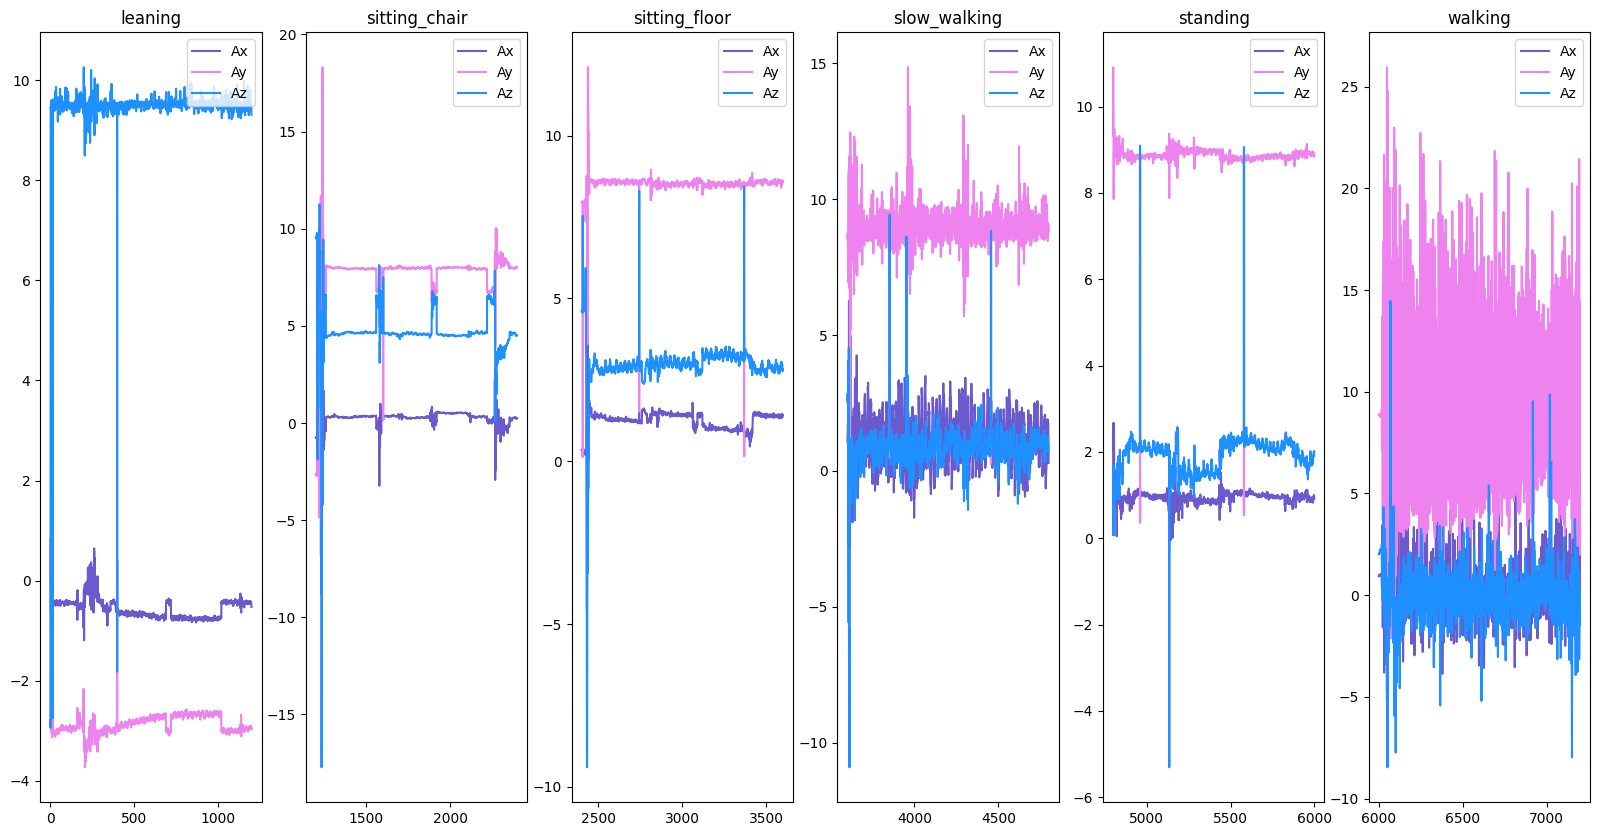

In [88]:
#가속도

from matplotlib import pyplot as plt
import numpy as np

x=[]
Ax=[]
Ay=[]
Az=[]
for i, action in enumerate(actions):
    x.append(visual_df.loc[visual_df['label']==i]['index'])
    Ax.append(visual_df.loc[visual_df['label']==i]['Ax'])
    Ay.append(visual_df.loc[visual_df['label']==i]['Ay'])
    Az.append(visual_df.loc[visual_df['label']==i]['Az'])

fig = plt.figure(figsize=(20, 10))
map=[]
for i, action in enumerate(actions):
    map.append(fig.add_subplot(1, 6, i+1))
    map[i].plot(x[i],Ax[i],'slateblue',label='Ax')
    map[i].plot(x[i],Ay[i],'violet',label='Ay')
    map[i].plot(x[i],Az[i],'dodgerblue',label='Az')
    map[i].legend(loc='upper right')

    plt.title(action)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = np.array(sequences)
y = to_categorical(labels).astype(int)

C:\Users\Leeyourack\AppData\Local\Temp\ipykernel_5820\1553910922.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(sequences)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 30)
(12, 30)
(228, 6)
(12, 6)


In [102]:
X_train[0]

array([array([1.66919868e+09, 1.37158203e+00, 8.56730652e+00, 2.84658813e+00]),
       array([1.66919868e+09, 1.36080933e+00, 8.61518860e+00, 2.77595520e+00]),
       array([1.66919868e+09, 1.36080933e+00, 8.59841919e+00, 2.80229187e+00]),
       array([1.66919868e+09, 1.36080933e+00, 8.61758423e+00, 2.69215393e+00]),
       array([1.66919868e+09, 1.36320496e+00, 8.65946960e+00, 2.71130371e+00]),
       array([1.66919868e+09, 1.34884644e+00, 8.59004211e+00, 2.66462708e+00]),
       array([1.66919868e+09, 1.32250977e+00, 8.65588379e+00, 2.69813538e+00]),
       array([1.66919868e+09, 1.35722351e+00, 8.60679626e+00, 2.67898560e+00]),
       array([1.66919868e+09, 1.36918640e+00, 8.64511108e+00, 2.65264893e+00]),
       array([1.66919868e+09, 1.35362244e+00, 8.63673401e+00, 2.65983582e+00]),
       array([1.66919868e+09, 1.33686829e+00, 8.64630127e+00, 2.65864563e+00]),
       array([1.66919868e+09, 1.34764099e+00, 8.67263794e+00, 2.65385437e+00]),
       array([1.66919868e+09, 1.38833618

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 30)
(12, 30)
(228, 6)
(12, 6)


In [10]:
#모델 불러오기
from keras.models import load_model
model = load_model('C:/Users/Leeyourack/jookyoung/pose_code/model_mqqt.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            17408     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
Total params: 172,070
Trainable params: 172,070
Non-tr

In [82]:
# 예측

import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)
window = []
predictions = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe("mobile-ingkle-test-healthcare/sm_q7_01/data/_all")

def on_message(client, userdata, msg):
    global window

    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
   

    row=[] 
    row.append((data[1][1],data[2][1],data[3][1]))
    row = np.array(row)[0]
    path =  os.path.join('C:/Users/Leeyourack/jookyoung/sensor/sensor_data/mqtt_DATA/walking/7/7.npy')         
    np.save(path, row)
    print('row:',row)


    window.extend([row])
    window = window[-30:] 
    
    #print('-'*70)
    if len(window) == 30:
        
        #print('window',window)
        res = model.predict(np.expand_dims(window, axis=0))[0]
        #print(res)
        print(np.argmax(res))
        predictions.append(np.argmax(res))
        
        
    
    #df.loc[len(df)] = test.values()
    
    

client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)

client.loop_forever()

Mqtt Connected!
row: [-1.6199646   2.1149292  10.69596863]
row: [-1.3230896   2.331604   10.71034241]
row: [-0.90649414  3.15879822 11.14369202]
row: [-5.22444153  5.84867859  3.52055359]
row: [-8.29859924  4.70425415  7.63139343]
row: [-2.66743469  4.06381226  7.46858215]
row: [-12.55429077   6.40533447   5.54844666]
row: [-12.13171387  12.81700134  -8.68748474]
row: [0.45579529 4.87783813 4.3992157 ]
row: [-4.16619873  5.04663086  8.43225098]
row: [-8.44345093  8.51701355  4.76913452]
row: [-4.878479    7.23612976  4.33457947]
row: [-2.93557739  6.30238342  6.96939087]
row: [-2.146698    6.88417053  9.71315002]
row: [-3.70173645  6.44963074  7.70321655]
row: [-6.97460938  4.82395935  7.26507568]
row: [-3.87890625  9.47828674  1.92601013]
row: [-3.12232971  7.91488647 -4.23666382]
row: [-2.43040466  1.83720398  3.01657104]
row: [-5.56681824  2.13526917 -0.09230042]
row: [0.68205261 6.10725403 5.20726013]
row: [  1.04837036   3.09295654 -11.83825684]
row: [ -2.79672241   9.41844177 -11

KeyboardInterrupt: 

In [276]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
f=1

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 5
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/Leeyourack/jookyoung/pose_code/video/predict6.avi', fourcc, fps, (w, h))


# Set mediapipe model 

while cap.isOpened():
    
    # Read feed
    ret, frame = cap.read()

    
    image = frame.copy()
    
    # 2. Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]  #최근 30이미지 keypoints
    sx=w*keypoints[0]
    sy=h*keypoints[1]

    #30장이 모이면 모델을 가지고 예측시작
    if len(sequence) == 30:
        
        res = model.predict(np.expand_dims(sequence, axis=0))[0] # 30장을 모델에 넣고 결과값을 얻는다
        print('res:',res)
        predictions.append(np.argmax(res)) # predictions:[0,2,0,1,...]=[walk, sit, walk, stand]
        a = actions[np.argmax(res)]
        if np.argmax(res) > threshold:

            cv2.putText(image, f'{a}', (int(sx)+40,int(sy+10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
        else:
            cv2.putText(image, 'non_use', (int(sx)+40,int(sy+10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)

        if np.unique(predictions[-10:])[0]==np.argmax(res):
            print('what?',np.unique(predictions[-10:])[0])
        
    

       
   
    # Show to screen
    cv2.imshow('OpenCV Feed', image)
    out.write(image)
        
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    f = f+1
out.release()
cap.release()
cv2.destroyAllWindows()

NameError: name 'extract_keypoints' is not defined